## Data전처리 작업 진행

In [215]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import os # 경로 확인 # print(os.getcwd())
import missingno as msno
import collections

plt.style.use('seaborn')
sns.set(font_scale = 1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [216]:
# matplotlib에서 한글 사용하기 위함.
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [217]:
# 데이터 불러오기
social = pd.read_csv('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/0. Data/사회통합실태조사_2019년.csv', encoding = 'euc-kr')

In [218]:
# 데이터 확인
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 275 entries, 데이터 ID to 학력b6
dtypes: float64(28), int64(247)
memory usage: 16.8 MB


In [219]:
social.iloc[:, :100].info() # 칼럼 100까지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 100 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   데이터 ID                                  8000 non-null   int64  
 1   모수추정 가중치                                8000 non-null   float64
 2   표준화 가중치                                 8000 non-null   float64
 3   어제의 주관적 정서 경험-행복감                       8000 non-null   int64  
 4   어제의 주관적 정서 경험-걱정(근심)                    8000 non-null   int64  
 5   어제의 주관적 정서 경험-우울감                       8000 non-null   int64  
 6   삶에 대한 만족도                               8000 non-null   int64  
 7   본인이 하는 일이 가치 있다고 생각하는 정도                8000 non-null   int64  
 8   우리 사회의 안전성에 대한 인식                       8000 non-null   int64  
 9   살고 있는 동네(시 군 구)의 안전성에 대한 인식             8000 non-null   int64  
 10  살고 있는 동네(읍 면 동)의 안전성에 대한 인식             8000 non-null   int

In [220]:
social.iloc[:, 100:200].info() # 지난 1년간 ~ 에서 "만족도"의 경우는 사용한 사람(1로 응답)한 사람에 대해서만 조사하였으므로, null이 존재함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 100 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   기관별 신뢰 정도-검찰                           8000 non-null   int64  
 1   기관별 신뢰 정도-경찰                           8000 non-null   int64  
 2   기관별 신뢰 정도-지방자치단체                       8000 non-null   int64  
 3   기관별 신뢰 정도-공기업                          8000 non-null   int64  
 4   기관별 신뢰 정도-군대                           8000 non-null   int64  
 5   기관별 신뢰 정도-노동조합단체                       8000 non-null   int64  
 6   기관별 신뢰 정도-시민단체                         8000 non-null   int64  
 7   기관별 신뢰 정도-TV방송사                        8000 non-null   int64  
 8   기관별 신뢰 정도-신문사                          8000 non-null   int64  
 9   기관별 신뢰 정도-교육기관                         8000 non-null   int64  
 10  기관별 신뢰 정도-의료기관                         8000 non-null   int64  
 11  기관별

In [221]:
social.iloc[:, 200:].info() # 본인 및 부모님의 학력-졸업/수료 여부의 null값은 정규교육 과정에서 '0. 안받았음'을 선택했으면 비어있기 때문에 존재함.
# 직업부분이 비는데 좀 더확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 75 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   자녀의 배우자로서 집단 구성원별 포용 정도-동성애자                   8000 non-null   int64  
 1   자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민                 8000 non-null   int64  
 2   사회갈등의 원인 (1순위)                                 8000 non-null   int64  
 3   사회갈등의 원인 (2순위)                                 8000 non-null   int64  
 4   우리 사회 갈등 정도-빈곤층과 중 상층                          8000 non-null   int64  
 5   우리 사회 갈등 정도-보수와 진보                             8000 non-null   int64  
 6   우리 사회 갈등 정도-근로자와 고용주                           8000 non-null   int64  
 7   우리 사회 갈등 정도-수도권과 지방                            8000 non-null   int64  
 8   우리 사회 갈등 정도-개발과 환경보존                           8000 non-null   int64  
 9   우리 사회 갈등 정도-노인층과 젊은층                           8000 

## 직업부분의 null 값이 비는 것에 대한 패턴 분석

In [222]:
temp = social.loc[:, '지난 일주일간 일자리 유무' : '직장 유형']

In [223]:
temp.head()

,지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,1,4.0,NaN,3.0,NaN,5.0
1,1,4.0,NaN,1.0,1.0,3.0
2,2,NaN,4.0,NaN,NaN,NaN
3,1,7.0,NaN,1.0,1.0,5.0
4,2,NaN,14.0,NaN,NaN,NaN


In [224]:
import math

In [225]:
math.isnan(temp.loc[2, '직업'])

True

In [226]:
whatdid_oneweek = list()
status = list()
contract_type = list()
worktype = list()
for job in range(np.shape(temp)[0]):
    if math.isnan(temp.loc[job, '직업']) == True:
       whatdid_oneweek.append(temp.loc[job, '지난 일주일간 일자리 없었을 시 한 일'])
       status.append(temp.loc[job, '직장에서의 지위'])
       contract_type.append(temp.loc[job, '상용/임시/일용 여부'])
       worktype.append(temp.loc[job, '직장 유형'])

In [227]:
import collections

In [228]:
# 추출한 데이터를 dictionary로 변환
whatdid_oneweek = collections.Counter(whatdid_oneweek)
status = collections.Counter(status)
contract_type = collections.Counter(contract_type)
worktype = collections.Counter(worktype)

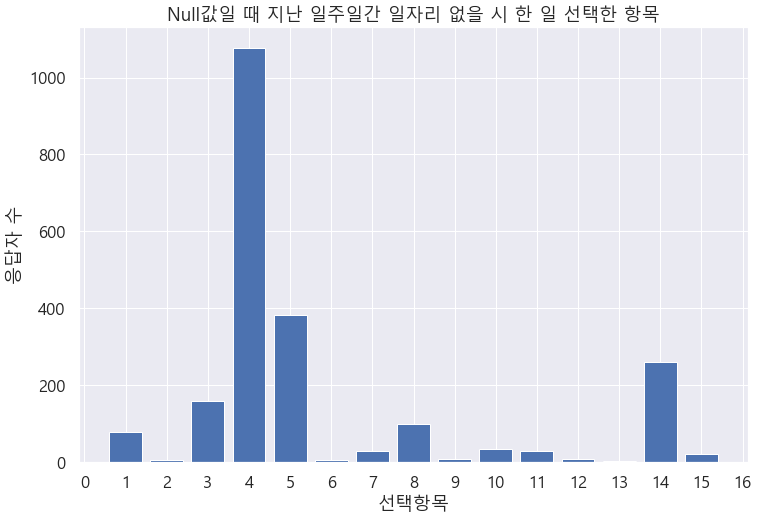

In [229]:
f, ax = plt.subplots(1, 1, figsize = (12,8))
plt.bar(*zip(*whatdid_oneweek.items()))
plt.xticks(np.arange(0, 17, 1))
plt.ylabel('응답자 수')
plt.xlabel('선택항목')
plt.title('Null값일 때 지난 일주일간 일자리 없을 시 한 일 선택한 항목')
plt.show()

# 4: 가사, 5: 정규기관통학, 14: 쉬었음, 3: 육아, 8: 취업준비 1: 구직활동 순으로 null값이 많음.
# 데이터를 살펴보니, 여기에 응답한 사람들은 그 뒷문항에 대해서 응답하지 아니하였음.

In [230]:
8000 - sum(whatdid_oneweek.values())

5811

In [231]:
## 데이터가 비는 것을 전부다 변환 --> 99로 변환하기

In [232]:
social = social.replace(np.nan, 99)

## 데이터 기초분석 (2019년)

In [233]:
social__temp = social[['성별', '어제의 주관적 정서 경험-행복감', '어제의 주관적 정서 경험-걱정(근심)', '어제의 주관적 정서 경험-우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도', '우리 사회의 안전성에 대한 인식', '사회적 지위에 대한 인식', '타인의 의견 존중 중요도', '이념적 성향', '우리 사회 집단 간 소통 수준-가족 간', '우리 사회 집단 간 소통 수준-직장 구성원 간', '우리 사회 집단 간 소통 수준-이웃 간', '우리 사회 집단 간 소통 수준-세대 간', '평일 하루 접촉하는 사람 수-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척(인터넷 종류)', '평일 하루 접촉하는 사람 수-가족 또는 친척 외', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외(인터넷 종류)', '갑자기 목돈이 필요할 경우 빌릴 수 있는 사람 수', '몸이 아플 때 도와줄 수 있는 사람 수', '우울할 때 사적으로 대화할 수 있는 사람 수', '외롭다고 느끼는 정도', '자살하고 싶은 생각이 드는 정도', '아무도 나를 잘 알지 못한다고 느끼는 정도', '일반적으로 사람들을 신뢰하는 정도', '집단별 신뢰 정도-가족', '집단별 신뢰 정도-이웃', '집단별 신뢰 정도-지인', '집단별 신뢰 정도-낯선 사람', '집단별 신뢰 정도-국내 거주 외국인', '기관별 신뢰 정도-중앙정부 부처', '기관별 신뢰 정도-국회', '기관별 신뢰 정도-법원', '기관별 신뢰 정도-검찰', '기관별 신뢰 정도-경찰', '기관별 신뢰 정도-지방자치단체', '기관별 신뢰 정도-공기업', '기관별 신뢰 정도-군대', '기관별 신뢰 정도-노동조합단체', '기관별 신뢰 정도-시민단체', '기관별 신뢰 정도-TV방송사', '기관별 신뢰 정도-신문사', '기관별 신뢰 정도-교육기관', '기관별 신뢰 정도-의료기관', '기관별 신뢰 정도-대기업', '기관별 신뢰 정도-종교기관', '기관별 신뢰 정도-금융기관']]  

In [234]:
temp = social.loc[:, '기관별 공정한 업무수행에 대한 인식-행정기관':'공정한 사회를 만들기 위한 방안-중산층 확대']

In [235]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [236]:
temp = social.loc[:, '집단 구성원 포용 정도-장애인':'사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)']

In [237]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [238]:
temp = social.loc[:, '연령']

In [239]:
social__temp = pd.concat([temp, social__temp], axis = 1)

In [240]:
temp = social.loc[:, '혼인상태': '직장 유형']

In [241]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [242]:
social__temp.head()

,연령,성별,어제의 주관적 정서 경험-행복감,어제의 주관적 정서 경험-걱정(근심),어제의 주관적 정서 경험-우울감,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,우리 사회의 안전성에 대한 인식,사회적 지위에 대한 인식,타인의 의견 존중 중요도,...,학력_정규교육 과정(아버지),학력_졸업/수료 여부(아버지),학력_정규교육 과정(어머니),학력_졸업/수료 여부(어머니),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,5,2,7,4,5,4,5,4,3,5,...,2,1.0,1,1.0,1,4.0,99.0,3.0,99.0,5.0
1,3,1,4,5,4,4,3,5,5,4,...,3,1.0,2,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,2,8,2,2,6,5,3,5,5,...,3,1.0,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,3,1,7,2,2,7,6,5,6,7,...,1,1.0,1,1.0,1,7.0,99.0,1.0,1.0,5.0
4,3,2,7,1,2,6,6,6,6,5,...,1,1.0,1,1.0,2,99.0,14.0,99.0,99.0,99.0


In [243]:
## 분석의 대상을 파일로 저장
social__temp.to_csv('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/0. Data/2019년_사회통합실태조사_cleaned.csv', encoding = 'euc-kr', index = False)

### Cleaned 된 데이터로 분석

In [244]:
print(os.getcwd())

c:\Users\azkz2\OneDrive\바탕 화면\Github\0. 대학원\2020_labor_final_project


In [245]:
social_2019 = pd.read_csv('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/0. Data/2019년_사회통합실태조사_cleaned.csv', encoding = 'euc-kr')

In [246]:
social_2019.iloc[:, :5].info

<bound method DataFrame.info of       연령  성별  어제의 주관적 정서 경험-행복감  어제의 주관적 정서 경험-걱정(근심)  어제의 주관적 정서 경험-우울감
0      5   2                  7                     4                  5
1      3   1                  4                     5                  4
2      2   2                  8                     2                  2
3      3   1                  7                     2                  2
4      3   2                  7                     1                  2
...   ..  ..                ...                   ...                ...
7995   4   1                  8                     1                  1
7996   2   2                  6                     2                  0
7997   1   2                  7                     0                  0
7998   1   1                  7                     3                  1
7999   4   1                  6                     5                  5

[8000 rows x 5 columns]>

In [247]:
social_2019.head()

,연령,성별,어제의 주관적 정서 경험-행복감,어제의 주관적 정서 경험-걱정(근심),어제의 주관적 정서 경험-우울감,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,우리 사회의 안전성에 대한 인식,사회적 지위에 대한 인식,타인의 의견 존중 중요도,...,학력_정규교육 과정(아버지),학력_졸업/수료 여부(아버지),학력_정규교육 과정(어머니),학력_졸업/수료 여부(어머니),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,5,2,7,4,5,4,5,4,3,5,...,2,1.0,1,1.0,1,4.0,99.0,3.0,99.0,5.0
1,3,1,4,5,4,4,3,5,5,4,...,3,1.0,2,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,2,8,2,2,6,5,3,5,5,...,3,1.0,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,3,1,7,2,2,7,6,5,6,7,...,1,1.0,1,1.0,1,7.0,99.0,1.0,1.0,5.0
4,3,2,7,1,2,6,6,6,6,5,...,1,1.0,1,1.0,2,99.0,14.0,99.0,99.0,99.0


In [248]:
## 성별의 분포도 확인

In [249]:
temp = social_2019.loc[:, '성별']

In [250]:
temp = collections.Counter(temp)
temp

Counter({2: 3989, 1: 4011})

In [251]:
# change int to string
temp['남자'] = temp.pop(1)
temp['여자'] = temp.pop(2)

In [252]:
temp

Counter({'남자': 4011, '여자': 3989})

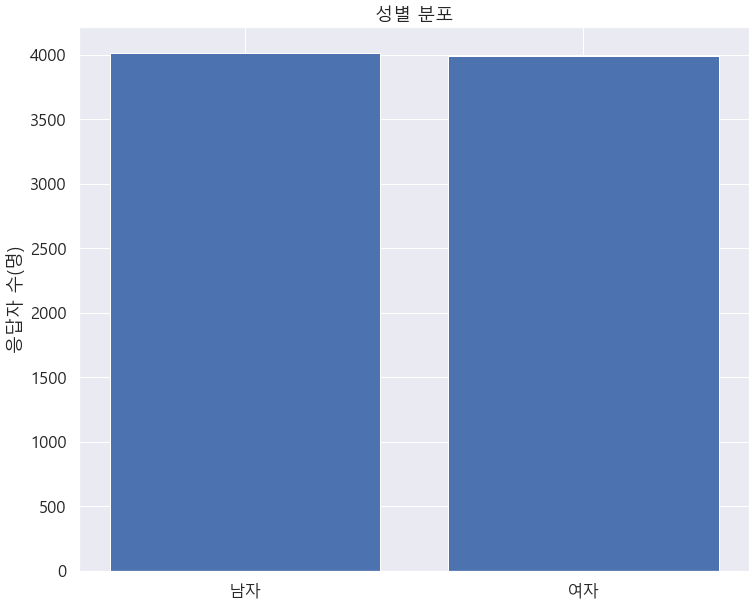

In [253]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp.keys(), temp.values())
plt.title('성별 분포')
plt.ylabel('응답자 수(명)')
plt.show()
## 거의 반반으로 조사하였음

## 성별에 따른 학력분포

In [254]:
social_2019.columns[:50]

Index(['연령', '성별', '어제의 주관적 정서 경험-행복감', '어제의 주관적 정서 경험-걱정(근심)',
       '어제의 주관적 정서 경험-우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도',
       '우리 사회의 안전성에 대한 인식', '사회적 지위에 대한 인식', '타인의 의견 존중 중요도', '이념적 성향',
       '우리 사회 집단 간 소통 수준-가족 간', '우리 사회 집단 간 소통 수준-직장 구성원 간',
       '우리 사회 집단 간 소통 수준-이웃 간', '우리 사회 집단 간 소통 수준-세대 간',
       '평일 하루 접촉하는 사람 수-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척(인터넷 종류)', '평일 하루 접촉하는 사람 수-가족 또는 친척 외',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외(인터넷 종류)', '갑자기 목돈이 필요할 경우 빌릴 수 있는 사람 수',
       '몸이 아플 때 도와줄 수 있는 사람 수', '우울할 때 사적으로 대화할 수 있는 사람 수', '외롭다고 느끼는 정도',
       '자살하고 싶은 생각이 드는 정도', '아무도 나를 잘 알지 못한다고 느끼는 정도', '일반적으로 사람들을 신뢰하는 정도',
       '집단별 신뢰 정도-가족', '집단별 신뢰 정도-이웃', '집단별 신뢰 정도-지인', '집단별 신뢰 정도-낯선 사람',
       '집단별 신뢰 정도-국내 거주 외국인', '기관별 신뢰 정도-중앙정부 부처', '기관별 신뢰 정도-국회',
       '기관별 신뢰 정도-법원', '기관별 신뢰 정도-검찰', '기관별 신뢰 정도-경찰', '기관별 신뢰 정도-지방자치단체',
       '기관별 신뢰 정도-공기업', '기관별 신뢰 정도-군대', '기관별

In [255]:
social_2019.columns[50:100]

Index(['기관별 공정한 업무수행에 대한 인식-행정기관', '기관별 공정한 업무수행에 대한 인식-국회',
       '기관별 공정한 업무수행에 대한 인식-법원', '기관별 공정한 업무수행에 대한 인식-검찰',
       '기관별 공정한 업무수행에 대한 인식-경찰', '기관별 공정한 업무수행에 대한 인식-중앙선거관리위원회',
       '우리 사회의 전반적 공정성에 대한 인식-교육 기회', '우리 사회의 전반적 공정성에 대한 인식-취업 기회',
       '우리 사회의 전반적 공정성에 대한 인식-과세 및 납세', '우리 사회의 전반적 공정성에 대한 인식-복지혜택',
       '우리 사회의 전반적 공정성에 대한 인식-지역균형발전', '우리 사회의 전반적 공정성에 대한 인식-법 집행',
       '우리 사회의 전반적 공정성에 대한 인식-정치 활동', '우리 사회의 전반적 공정성에 대한 인식-성별에 따른 대우',
       '우리 사회의 전반적 공정성에 대한 인식-언론 보도', '우리 사회의 전반적 공정성에 대한 인식-대기업 중소기업 간 관계',
       '우리 사회의 전반적 공정성에 대한 인식-경제 사회적인 분배구조', '우리 사회의 전반적 공정성에 대한 인식-병역 의무 이행',
       '공정한 사회를 만들기 위한 방안-공공정보 공개', '공정한 사회를 만들기 위한 방안-국민 참여 확대',
       '공정한 사회를 만들기 위한 방안-행정절차 강화', '공정한 사회를 만들기 위한 방안-공직청렴도 강화',
       '공정한 사회를 만들기 위한 방안-고등교육 기회 확대', '공정한 사회를 만들기 위한 방안-취업기회 보장',
       '공정한 사회를 만들기 위한 방안-사회복지서비스 확대', '공정한 사회를 만들기 위한 방안-기득권 양보',
       '공정한 사회를 만들기 위한 방안-상류층의 솔선수범', '공정한 사회를 만들기 위한 방안-중산층 확대',
       '집단 구성원 포용 정도-장애인', '집단 구성원 포용 정도-결손 

In [256]:
social_2019.columns[100:]

Index(['우리 사회 갈등 정도-내국인과 외국인', '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체',
       '사회통합을 위해 중심적 역할을 해야 할 집단 (1순위)', '사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)',
       '혼인상태', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '학력_정규교육 과정(아버지)',
       '학력_졸업/수료 여부(아버지)', '학력_정규교육 과정(어머니)', '학력_졸업/수료 여부(어머니)',
       '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위',
       '상용/임시/일용 여부', '직장 유형'],
      dtype='object')

In [257]:
temp = social_2019[['성별', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)']]

In [258]:
temp.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인)
0,2,3,1.0
1,1,4,1.0
2,2,3,1.0
3,1,3,1.0
4,2,3,1.0


In [259]:
temp_1 = temp.loc[temp['성별'] == 1].reset_index(drop = True)
temp_2 = temp.loc[temp['성별'] == 2].reset_index(drop = True)

In [260]:
## 남자부터 분석
temp_1__education = collections.Counter(temp_1['학력_정규교육 과정(본인)'])
temp_1__education

Counter({4: 863, 3: 1224, 2: 178, 5: 1558, 1: 80, 7: 18, 0: 6, 6: 84})

In [261]:
# labeling
temp_1__education['대학(교)(4년제 미만)'] = temp_1__education.pop(4)
temp_1__education['고등학교'] = temp_1__education.pop(3)
temp_1__education['중학교'] = temp_1__education.pop(2)
temp_1__education['대학교(4년제 이상)'] = temp_1__education.pop(5)
temp_1__education['초등학교'] = temp_1__education.pop(1)
temp_1__education['대학원 박사 과정'] = temp_1__education.pop(7)
temp_1__education['안 받았음'] = temp_1__education.pop(0)
temp_1__education['대학원 석사 과정'] = temp_1__education.pop(6)

In [262]:
temp_1__education = dict(sorted(temp_1__education.items(), key = lambda item:item[1], reverse = True))
temp_1__education

{'대학교(4년제 이상)': 1558,
 '고등학교': 1224,
 '대학(교)(4년제 미만)': 863,
 '중학교': 178,
 '대학원 석사 과정': 84,
 '초등학교': 80,
 '대학원 박사 과정': 18,
 '안 받았음': 6}

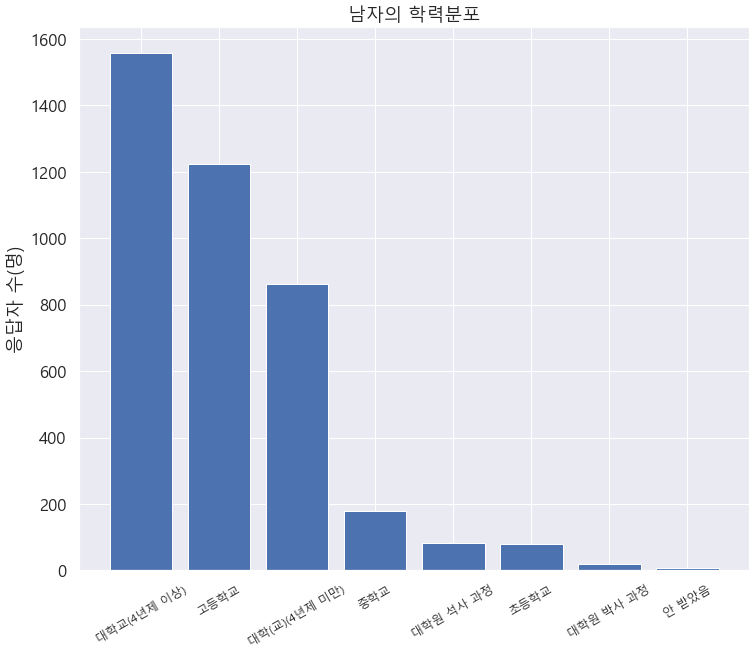

In [263]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp_1__education.keys(), temp_1__education.values())
plt.title('남자의 학력분포')
plt.ylabel('응답자 수(명)')
plt.xticks(rotation = 30, fontsize = 'large')
fig = plt.gcf()
fig.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/남자의 학력분포.png', dpi = 150)
plt.show()

In [264]:
## 여자들의 학력도 확인
temp_2.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인)
0,2,3,1.0
1,2,3,1.0
2,2,3,1.0
3,2,4,1.0
4,2,3,1.0


In [265]:
temp_2__education = collections.Counter(temp_2['학력_정규교육 과정(본인)'])
temp_2__education

Counter({3: 1444, 4: 874, 2: 285, 5: 1133, 1: 166, 6: 60, 7: 11, 0: 16})

In [266]:
# labeling
temp_2__education['대학(교)(4년제 미만)'] = temp_2__education.pop(4)
temp_2__education['고등학교'] = temp_2__education.pop(3)
temp_2__education['중학교'] = temp_2__education.pop(2)
temp_2__education['대학교(4년제 이상)'] = temp_2__education.pop(5)
temp_2__education['초등학교'] = temp_2__education.pop(1)
temp_2__education['대학원 박사 과정'] = temp_2__education.pop(7)
temp_2__education['안 받았음'] = temp_2__education.pop(0)
temp_2__education['대학원 석사 과정'] = temp_2__education.pop(6)

In [267]:
temp_2__education = dict(sorted(temp_2__education.items(), key = lambda item:item[1], reverse = True))

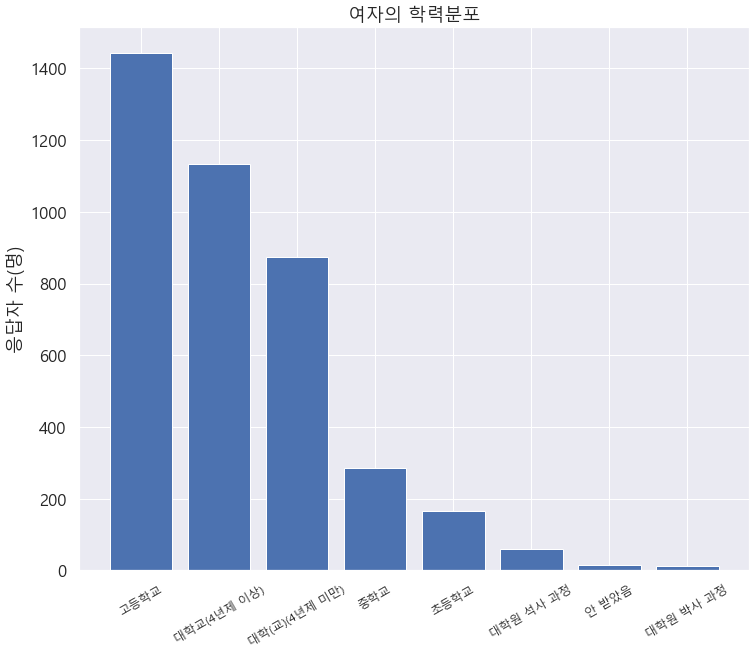

In [268]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp_2__education.keys(), temp_2__education.values())
plt.title('여자의 학력분포')
plt.ylabel('응답자 수(명)')
plt.xticks(rotation = 30, fontsize = 'large')
fig = plt.gcf()
fig.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/여자의 학력분포.png', dpi = 150)
plt.show()

In [269]:
# 남자랑 여자 동시에 비교

In [270]:
for i in range(np.shape(temp)[0]):
    if temp.loc[i, '학력_정규교육 과정(본인)'] == 0:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '안 받았음'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 1:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '초등학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 2:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '중학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 3:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '고등학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 4:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학(교)(4년제 미만)'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 5:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학교(4년제 이상)'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 6:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학원 석사 과정'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 7:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학원 박사 과정' 

In [271]:
for i in range(np.shape(temp)[0]):
    if temp.loc[i, '성별'] == 1:
        temp.loc[i, '성별'] = '남자'
    else:
        temp.loc[i, '성별'] = '여자' 

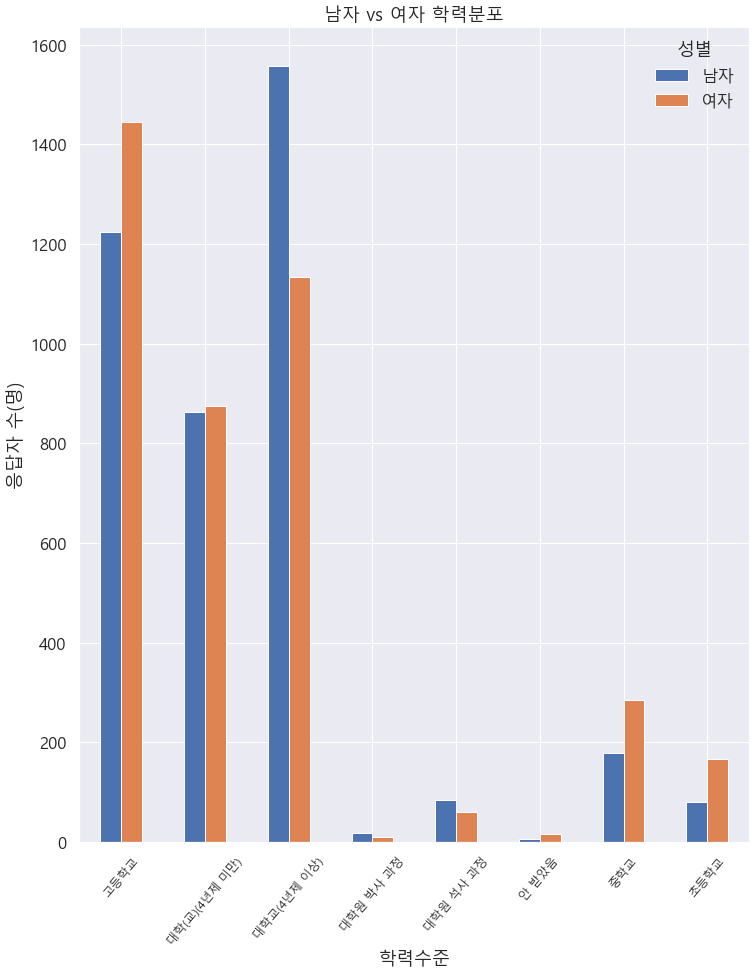

In [272]:
plot = temp.groupby(['학력_정규교육 과정(본인)', '성별']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12, 15), title = '남자 vs 여자 학력분포')
plot.tick_params(
    axis = 'x',
    labelrotation = 50,
    labelsize = 'large'
    )
plot.set_xlabel('학력수준')
plot.set_ylabel('응답자 수(명)')
fig = plot.get_figure()
fig.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/남자vs여자 학력분포.png', dpi = 150)

### 성별 직업 분포 확인

In [347]:
temp = social_2019[['성별', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형']]

In [348]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   성별                     8000 non-null   int64  
 1   학력_정규교육 과정(본인)         8000 non-null   int64  
 2   학력_졸업/수료 여부(본인)        8000 non-null   float64
 3   지난 일주일간 일자리 유무         8000 non-null   int64  
 4   직업                     8000 non-null   float64
 5   지난 일주일간 일자리 없었을 시 한 일  8000 non-null   float64
 6   직장에서의 지위               8000 non-null   float64
 7   상용/임시/일용 여부            8000 non-null   float64
 8   직장 유형                  8000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 562.6 KB


In [349]:
temp.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,2,3,1.0,1,4.0,99.0,3.0,99.0,5.0
1,1,4,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,1,3,1.0,1,7.0,99.0,1.0,1.0,5.0
4,2,3,1.0,2,99.0,14.0,99.0,99.0,99.0


In [350]:
temp = temp.astype(str) # string으로 변환

In [351]:
# 직업 및 성별 type 변환
for i in range(np.shape(temp)[0]):
    if temp['성별'][i] == '1':
        temp['성별'][i] = '남자'
    else:
        temp['성별'][i] = '여자'


for i in range(np.shape(temp)[0]):
    if temp['직업'][i] == '1.0':
        temp['직업'][i] = '관리자'
    elif temp['직업'][i] == '2.0':
        temp['직업'][i] = '전문가 및 관련 종사자'
    elif temp['직업'][i] == '3.0':
        temp['직업'][i] = '사무 종사자'
    elif temp['직업'][i] == '4.0':
        temp['직업'][i] = '서비스 종사자'
    elif temp['직업'][i] == '5.0':
        temp['직업'][i] = '판매 종사자'
    elif temp['직업'][i] == '6.0':
        temp['직업'][i] = '농림어업 종사자'
    elif temp['직업'][i] == '7.0':
        temp['직업'][i] = '기능원 및 관련 기능종사자'
    elif temp['직업'][i] == '8.0':
        temp['직업'][i] = '장치 기계조작 및 조립종사자'
    elif temp['직업'][i] == '9.0':
        temp['직업'][i] = '단순노무 종사자'
    elif temp['직업'][i] == '10.0':
        temp['직업'][i] = '군인'
    else:
        temp['직업'][i] = '직업 없음'

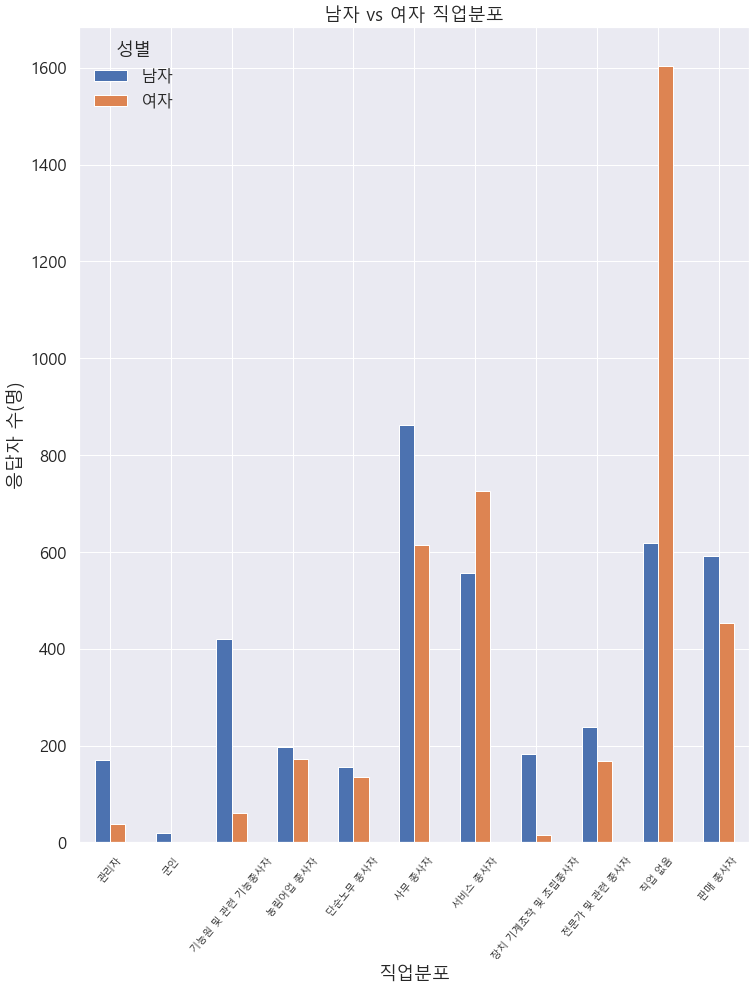

In [352]:
plot = temp.groupby(['직업', '성별']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12, 15), title = '남자 vs 여자 직업분포')
plot.tick_params(
    axis = 'x',
    labelrotation = 50,
    labelsize = 'medium'
)

plot.set_xlabel('직업분포')
plot.set_ylabel('응답자 수(명)')
fig = plot.get_figure()
fig.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/남자 vs 여자 직업분포.png', dpi = 150)

- 데이터에서 보면 알 수 있듯이, 관리자급에서 남자의 비율이 상대적으로 높은 것으로 보임 --> 회사의 중역급으로 생각하면 될 듯
- 또한 사무종사자에서 남자의 비중이 높음.
- 여자의 경우 '직업 없음'의 비중이 상당히 높은데, 이는 가사 등의 요인이 작용한 것으로 확인됨. 
-> 4: 가사, 5: 정규기관통학, 14: 쉬었음, 3: 육아, 8: 취업준비 1: 구직활동 순으로 직업 없는 사람들이 지난 일주일간 하였던 활동임(ln##에 있음)

## 직업이 없는 경우 남자와 여자는 각기 무얼 했는지 확인

In [353]:
set(temp['지난 일주일간 일자리 없었을 시 한 일'])

{'1.0',
 '10.0',
 '11.0',
 '12.0',
 '13.0',
 '14.0',
 '15.0',
 '2.0',
 '3.0',
 '4.0',
 '5.0',
 '6.0',
 '7.0',
 '8.0',
 '9.0',
 '99.0'}

In [354]:
for i in range(np.shape(temp)[0]):
    if temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '1.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '구직활동'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '2.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '발령대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '3.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '육아'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '4.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '가사'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '5.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '정규교육기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '6.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '입시학원 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '7.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업을 위한 학원 기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '8.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '9.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '진학준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '10.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '연로'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '11.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '심신장애'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '12.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '군입대 대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '13.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '결혼 준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '14.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '쉬었음'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '15.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '기타'
    else:
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '직업 있음'

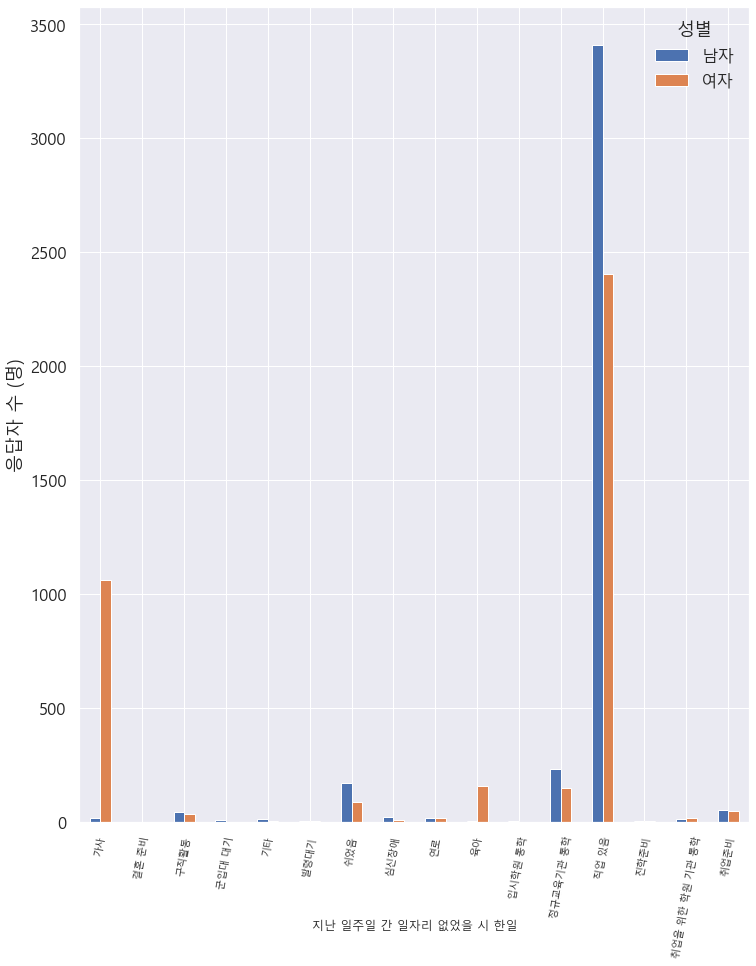

In [355]:
plot = temp.groupby(['지난 일주일간 일자리 없었을 시 한 일', '성별']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12, 15))
plot.tick_params(
    axis = 'x',
    labelsize = 'medium',
    labelrotation = 80
)
plot.set_xlabel('지난 일주일 간 일자리 없었을 시 한일', fontsize = 'large')
plot.xaxis.set_label_coords(0.5, -0.12)
plot.set_ylabel('응답자 수 (명)')
fig = plot.get_figure()
fig.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/직업X_1주일동안_한일.png', dpi = 150)

- 대부분 직업이 없는 경우 여자는 확연하게 "가사 및 육아"로 인해서 하지 않았던 것을 알 수 있다.

# 가설
- 많은 페미니즘 운동가들은 직업에서 남자와 여자들의 차별이 존재한다고 생각하고 있다. 그렇다면 일을 하지 못하고 있는 사람들은 현재 사회를 어떻게 바라보고 있는가? 사회에 대한 만족도는? 그리고 그들이 손꼽은 사회 갈등정도는?

- 또한 추가적으로, 트위터에서의 페미니즘 운동은 정규분포가 아닌 biased된 분포를 가지고 있을 확률이 큼. 나의 경험상으로는 아직 사회에서 그렇게 말하는 사람이 없었을 뿐더러, 있더라도 오프라인에서 그것을 드러내지 않는 경우가 많음. 또한 몇몇 커뮤니티에서 페미니즘을 비꼴때, 넷상에서만 페미니즘 운동을 한다고 비웃는 경우가 많은데 한번 실제로 이런지 확인 ## --> 설문지 중에서 사회적으로 접촉하는 사람이 몇명이나 있는지 확인

## 직업을 가지지 못하고, 그 중에서 육아 및 가사를 하는 사람에 대한 분석 -> 사회만족도 및 사회 갈등 요인들에 대한 분석을 진행

In [415]:
temp = social_2019[['성별', '어제의 주관적 정서 경험-행복감', '어제의 주관적 정서 경험-걱정(근심)', '어제의 주관적 정서 경험-우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형']]

In [416]:
temp = temp.astype(str)

# 직업 및 성별 type 변환
for i in range(np.shape(temp)[0]):
    if temp['성별'][i] == '1':
        temp['성별'][i] = '남자'
    else:
        temp['성별'][i] = '여자'


for i in range(np.shape(temp)[0]):
    if temp['직업'][i] == '1.0':
        temp['직업'][i] = '관리자'
    elif temp['직업'][i] == '2.0':
        temp['직업'][i] = '전문가 및 관련 종사자'
    elif temp['직업'][i] == '3.0':
        temp['직업'][i] = '사무 종사자'
    elif temp['직업'][i] == '4.0':
        temp['직업'][i] = '서비스 종사자'
    elif temp['직업'][i] == '5.0':
        temp['직업'][i] = '판매 종사자'
    elif temp['직업'][i] == '6.0':
        temp['직업'][i] = '농림어업 종사자'
    elif temp['직업'][i] == '7.0':
        temp['직업'][i] = '기능원 및 관련 기능종사자'
    elif temp['직업'][i] == '8.0':
        temp['직업'][i] = '장치 기계조작 및 조립종사자'
    elif temp['직업'][i] == '9.0':
        temp['직업'][i] = '단순노무 종사자'
    elif temp['직업'][i] == '10.0':
        temp['직업'][i] = '군인'
    else:
        temp['직업'][i] = '직업 없음'

# 직없 없는 사람 변환
for i in range(np.shape(temp)[0]):
    if temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '1.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '구직활동'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '2.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '발령대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '3.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '육아'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '4.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '가사'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '5.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '정규교육기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '6.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '입시학원 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '7.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업을 위한 학원 기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '8.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '9.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '진학준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '10.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '연로'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '11.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '심신장애'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '12.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '군입대 대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '13.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '결혼 준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '14.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '쉬었음'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '15.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '기타'
    else:
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '직업 있음'


In [417]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   성별                        8000 non-null   object
 1   어제의 주관적 정서 경험-행복감         8000 non-null   object
 2   어제의 주관적 정서 경험-걱정(근심)      8000 non-null   object
 3   어제의 주관적 정서 경험-우울감         8000 non-null   object
 4   삶에 대한 만족도                 8000 non-null   object
 5   본인이 하는 일이 가치 있다고 생각하는 정도  8000 non-null   object
 6   학력_정규교육 과정(본인)            8000 non-null   object
 7   학력_졸업/수료 여부(본인)           8000 non-null   object
 8   지난 일주일간 일자리 유무            8000 non-null   object
 9   직업                        8000 non-null   object
 10  지난 일주일간 일자리 없었을 시 한 일     8000 non-null   object
 11  직장에서의 지위                  8000 non-null   object
 12  상용/임시/일용 여부               8000 non-null   object
 13  직장 유형                     8000 non-null   object
dtypes: object(14)
memory usa

In [427]:
temp_chores = temp[(temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '가사') | (temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '육아')]

In [428]:
# reset_index
temp_chores = temp_chores.reset_index(drop = True)

In [429]:
temp_chores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   성별                        1237 non-null   object
 1   어제의 주관적 정서 경험-행복감         1237 non-null   object
 2   어제의 주관적 정서 경험-걱정(근심)      1237 non-null   object
 3   어제의 주관적 정서 경험-우울감         1237 non-null   object
 4   삶에 대한 만족도                 1237 non-null   object
 5   본인이 하는 일이 가치 있다고 생각하는 정도  1237 non-null   object
 6   학력_정규교육 과정(본인)            1237 non-null   object
 7   학력_졸업/수료 여부(본인)           1237 non-null   object
 8   지난 일주일간 일자리 유무            1237 non-null   object
 9   직업                        1237 non-null   object
 10  지난 일주일간 일자리 없었을 시 한 일     1237 non-null   object
 11  직장에서의 지위                  1237 non-null   object
 12  상용/임시/일용 여부               1237 non-null   object
 13  직장 유형                     1237 non-null   object
dtypes: object(14)
memory usa

In [421]:
temp_chores.head()

,성별,어제의 주관적 정서 경험-행복감,어제의 주관적 정서 경험-걱정(근심),어제의 주관적 정서 경험-우울감,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,여자,8,2,2,6,5,3,1.0,2,직업 없음,가사,99.0,99.0,99.0
1,여자,6,3,3,6,5,3,1.0,2,직업 없음,가사,99.0,99.0,99.0
2,여자,5,4,3,5,5,2,1.0,2,직업 없음,가사,99.0,99.0,99.0
3,여자,6,3,3,6,5,3,1.0,2,직업 없음,가사,99.0,99.0,99.0
4,여자,5,5,4,4,5,3,1.0,2,직업 없음,가사,99.0,99.0,99.0


In [422]:
# 일단 성별분포가 어떻게 되어있는지 확인

In [430]:
sum(temp_chores['성별'] == '남자') # 남자 19명 있음.

19

- 남자는 제외하고 분석진행

In [432]:
temp_chores = temp_chores[temp_chores.loc[:, '성별'] == '여자']

In [433]:
# 가사 + 육아를 합쳐서 그냥 집안일로 변환(분석의 용이성을 위해)
temp_chores['지난 일주일간 일자리 없었을 시 한 일'] = '집안일'

In [434]:
# column명 변경
temp_chores = temp_chores.rename(columns = {'어제의 주관적 정서 경험-행복감':'행복감', '어제의 주관적 정서 경험-걱정(근심)':'걱정 및 근심', '어제의 주관적 정서 경험-우울감':'우울감'})

In [437]:
temp_chores.columns

Index(['성별', '행복감', '걱정 및 근심', '우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도',
       '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업',
       '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형'],
      dtype='object')

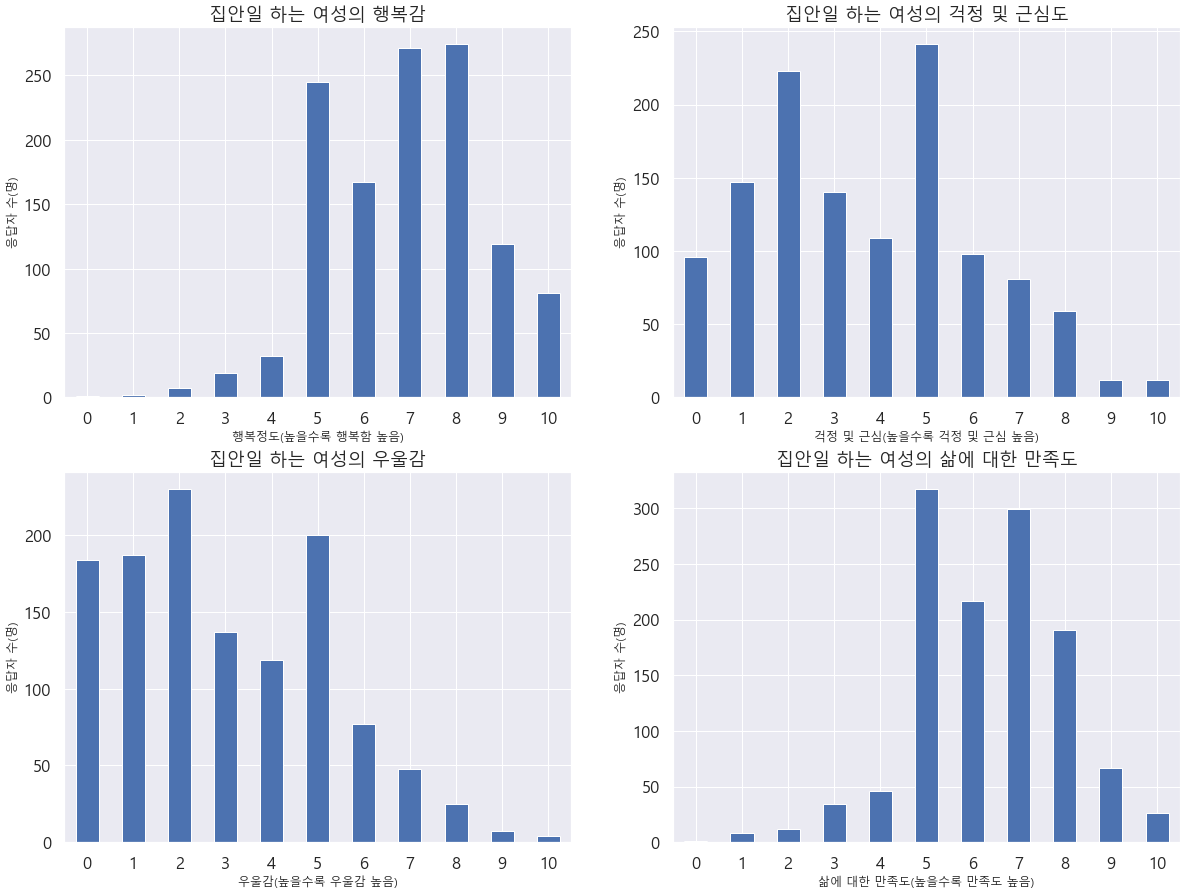

In [456]:
f, ax = plt.subplots(2,2, figsize = (20, 15))
plot1 = temp_chores['행복감'].value_counts().reindex(index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']).plot(kind = 'bar', ax = ax[0, 0])
plot2 = temp_chores['걱정 및 근심'].value_counts().reindex(index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']).plot(kind = 'bar', ax = ax[0, 1])
plot3 = temp_chores['우울감'].value_counts().reindex(index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']).plot(kind = 'bar', ax = ax[1, 0])
plot4 = temp_chores['삶에 대한 만족도'].value_counts().reindex(index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']).plot(kind = 'bar', ax = ax[1, 1])

plot1.tick_params(
    axis = 'x',
    labelrotation = 360
)
plot1.set_ylabel('응답자 수(명)', fontsize = 'large')
plot1.set_xlabel('행복정도(높을수록 행복함 높음)', fontsize = 'large')
plot1.set_title('집안일 하는 여성의 행복감')

plot2.tick_params(
    axis = 'x',
    labelrotation = 360
)
plot2.set_ylabel('응답자 수(명)', fontsize = 'large')
plot2.set_xlabel('걱정 및 근심(높을수록 걱정 및 근심 높음)', fontsize = 'large')
plot2.set_title('집안일 하는 여성의 걱정 및 근심도')

plot3.tick_params(
    axis = 'x',
    labelrotation = 360
)
plot3.set_ylabel('응답자 수(명)', fontsize = 'large')
plot3.set_xlabel('우울감(높을수록 우울감 높음)', fontsize = 'large')
plot3.set_title('집안일 하는 여성의 우울감')

plot4.tick_params(
    axis = 'x',
    labelrotation = 360
)
plot4.set_ylabel('응답자 수(명)', fontsize = 'large')
plot4.set_xlabel('삶에 대한 만족도(높을수록 만족도 높음)', fontsize = 'large')
plot4.set_title('집안일 하는 여성의 삶에 대한 만족도')

plt.savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/집안일 여성의 정서감.png', dpi = 150)
plt.show()

- 예상과는 다르게 집안일 하는 여성의 행복감은 높은 것으로 나옴. --> 나이에 따라서 어떻게 변한지 확인을 해보자.

In [578]:
temp = social_2019[['성별', '연령', '어제의 주관적 정서 경험-행복감', '어제의 주관적 정서 경험-걱정(근심)', '어제의 주관적 정서 경험-우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형']]

In [579]:
temp = temp.astype(str)

# 직업 및 성별 type 변환
for i in range(np.shape(temp)[0]):
    if temp['성별'][i] == '1':
        temp['성별'][i] = '남자'
    else:
        temp['성별'][i] = '여자'

# 연령대 변환
for i in range(np.shape(temp)[0]):
    if temp['연령'][i] == '1':
        temp['연령'][i] = '19~29세'
    elif temp['연령'][i] == '2':
        temp['연령'][i] = '30대'
    elif temp['연령'][i] == '3':
        temp['연령'][i] = '40대'
    elif temp['연령'][i] == '4':
        temp['연령'][i] = '50대'
    elif temp['연령'][i] == '5':
        temp['연령'][i] = '60~69세'

for i in range(np.shape(temp)[0]):
    if temp['직업'][i] == '1.0':
        temp['직업'][i] = '관리자'
    elif temp['직업'][i] == '2.0':
        temp['직업'][i] = '전문가 및 관련 종사자'
    elif temp['직업'][i] == '3.0':
        temp['직업'][i] = '사무 종사자'
    elif temp['직업'][i] == '4.0':
        temp['직업'][i] = '서비스 종사자'
    elif temp['직업'][i] == '5.0':
        temp['직업'][i] = '판매 종사자'
    elif temp['직업'][i] == '6.0':
        temp['직업'][i] = '농림어업 종사자'
    elif temp['직업'][i] == '7.0':
        temp['직업'][i] = '기능원 및 관련 기능종사자'
    elif temp['직업'][i] == '8.0':
        temp['직업'][i] = '장치 기계조작 및 조립종사자'
    elif temp['직업'][i] == '9.0':
        temp['직업'][i] = '단순노무 종사자'
    elif temp['직업'][i] == '10.0':
        temp['직업'][i] = '군인'
    else:
        temp['직업'][i] = '직업 없음'

# 직없 없는 사람 변환
for i in range(np.shape(temp)[0]):
    if temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '1.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '구직활동'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '2.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '발령대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '3.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '육아'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '4.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '가사'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '5.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '정규교육기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '6.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '입시학원 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '7.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업을 위한 학원 기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '8.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '9.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '진학준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '10.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '연로'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '11.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '심신장애'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '12.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '군입대 대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '13.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '결혼 준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '14.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '쉬었음'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '15.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '기타'
    else:
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '직업 있음'

In [580]:
temp_chores = temp[(temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '가사') | (temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '육아')]
# reset_index
temp_chores = temp_chores.reset_index(drop = True)
# 여자에 대해서만 진행
temp_chores = temp_chores[temp_chores.loc[:, '성별'] == '여자']
# 가사 + 육아를 합쳐서 그냥 집안일로 변환(분석의 용이성을 위해)
temp_chores['지난 일주일간 일자리 없었을 시 한 일'] = '집안일'
# column명 변경
temp_chores = temp_chores.rename(columns = {'어제의 주관적 정서 경험-행복감':'행복감', '어제의 주관적 정서 경험-걱정(근심)':'걱정 및 근심', '어제의 주관적 정서 경험-우울감':'우울감'})

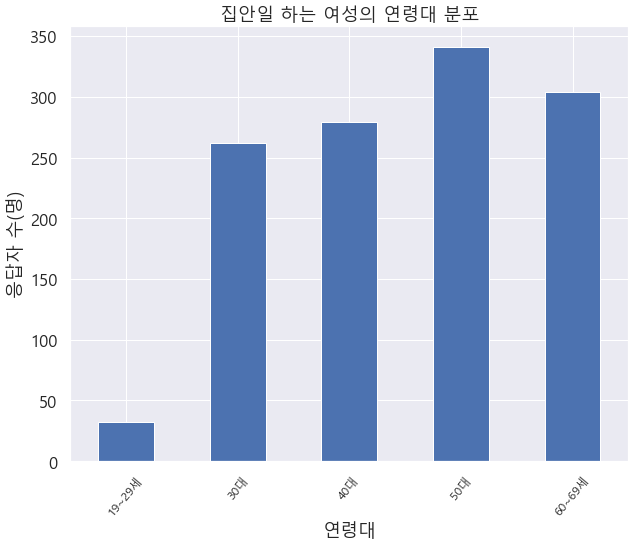

In [584]:
plot = temp_chores['연령'].value_counts().reindex(index=['19~29세', '30대', '40대', '50대', '60~69세']).plot(kind = 'bar', figsize = (10, 8))
plot.set_title('집안일 하는 여성의 연령대 분포')
plot.tick_params(
    axis = 'x',
    labelrotation = 50,
    labelsize = 'large'
)
plot.set_ylabel('응답자 수(명)')
plot.set_xlabel('연령대')

plot.get_figure().savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/집안일 하는 여성의 연령대 분포.png', dpi = 150)
plt.show()

- 나이가 많은 사람들이 있어서 정확한 표본이라고 볼 수 없으며, 나이특성상 여자들이 집안일을 하는 걸 당연하게 생각할 가능성이 존재함.
나이가 많은 사람들이 있어서 정확한 표본이라고 볼 수 없으며, 나이특성상 여자들이 집안일을 하는 걸 당연하게 생각할 가능성이 존재함.
- 집안일 하는 여자들의 나이별로 남녀갈등이 사회문제라고 생각하는 것의 평균을 구해보자

In [585]:
temp = social_2019[['성별', '연령', '어제의 주관적 정서 경험-행복감', '어제의 주관적 정서 경험-걱정(근심)', '어제의 주관적 정서 경험-우울감', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형', '우리 사회 갈등 정도-남자와 여자']] 

In [586]:
temp = temp.astype(str)

# 직업 및 성별 type 변환
for i in range(np.shape(temp)[0]):
    if temp['성별'][i] == '1':
        temp['성별'][i] = '남자'
    else:
        temp['성별'][i] = '여자'

# 연령대 변환
for i in range(np.shape(temp)[0]):
    if temp['연령'][i] == '1':
        temp['연령'][i] = '19~29세'
    elif temp['연령'][i] == '2':
        temp['연령'][i] = '30대'
    elif temp['연령'][i] == '3':
        temp['연령'][i] = '40대'
    elif temp['연령'][i] == '4':
        temp['연령'][i] = '50대'
    elif temp['연령'][i] == '5':
        temp['연령'][i] = '60~69세'

for i in range(np.shape(temp)[0]):
    if temp['직업'][i] == '1.0':
        temp['직업'][i] = '관리자'
    elif temp['직업'][i] == '2.0':
        temp['직업'][i] = '전문가 및 관련 종사자'
    elif temp['직업'][i] == '3.0':
        temp['직업'][i] = '사무 종사자'
    elif temp['직업'][i] == '4.0':
        temp['직업'][i] = '서비스 종사자'
    elif temp['직업'][i] == '5.0':
        temp['직업'][i] = '판매 종사자'
    elif temp['직업'][i] == '6.0':
        temp['직업'][i] = '농림어업 종사자'
    elif temp['직업'][i] == '7.0':
        temp['직업'][i] = '기능원 및 관련 기능종사자'
    elif temp['직업'][i] == '8.0':
        temp['직업'][i] = '장치 기계조작 및 조립종사자'
    elif temp['직업'][i] == '9.0':
        temp['직업'][i] = '단순노무 종사자'
    elif temp['직업'][i] == '10.0':
        temp['직업'][i] = '군인'
    else:
        temp['직업'][i] = '직업 없음'

# 직없 없는 사람 변환
for i in range(np.shape(temp)[0]):
    if temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '1.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '구직활동'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '2.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '발령대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '3.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '육아'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '4.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '가사'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '5.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '정규교육기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '6.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '입시학원 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '7.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업을 위한 학원 기관 통학'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '8.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '취업준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '9.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '진학준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '10.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '연로'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '11.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '심신장애'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '12.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '군입대 대기'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '13.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '결혼 준비'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '14.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '쉬었음'
    elif temp['지난 일주일간 일자리 없었을 시 한 일'][i] == '15.0':
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '기타'
    else:
        temp['지난 일주일간 일자리 없었을 시 한 일'][i] = '직업 있음'


# 사회갈등 정도 선택한 column을 한글로 하나 만들고, 하나는 int로 선언해서 점수계산하는 용으로 사용
temp['우리 사회 갈등 정도-남자와 여자(점수)'] = list(temp['우리 사회 갈등 정도-남자와 여자'].astype(int).values)

for i in range(np.shape(temp)[0]):
    if temp['우리 사회 갈등 정도-남자와 여자'][i] == '1':
        temp['우리 사회 갈등 정도-남자와 여자'][i] = '전혀 심하지 않다'
    elif temp['우리 사회 갈등 정도-남자와 여자'][i] == '2':
        temp['우리 사회 갈등 정도-남자와 여자'][i] = '별로 심하지 않다'
    elif temp['우리 사회 갈등 정도-남자와 여자'][i] == '3':
        temp['우리 사회 갈등 정도-남자와 여자'][i] = '약간 심하다'
    elif temp['우리 사회 갈등 정도-남자와 여자'][i] == '4':
        temp['우리 사회 갈등 정도-남자와 여자'][i] = '매우 심하다'
    else:
        temp['우리 사회 갈등 정도-남자와 여자'][i] = '모름/무응답'

In [587]:
temp_chores = temp[(temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '가사') | (temp.loc[:, '지난 일주일간 일자리 없었을 시 한 일'] == '육아')]
# reset_index
temp_chores = temp_chores.reset_index(drop = True)
# 여자에 대해서만 진행
temp_chores = temp_chores[temp_chores.loc[:, '성별'] == '여자']
# 가사 + 육아를 합쳐서 그냥 집안일로 변환(분석의 용이성을 위해)
temp_chores['지난 일주일간 일자리 없었을 시 한 일'] = '집안일'
# column명 변경
temp_chores = temp_chores.rename(columns = {'어제의 주관적 정서 경험-행복감':'행복감', '어제의 주관적 정서 경험-걱정(근심)':'걱정 및 근심', '어제의 주관적 정서 경험-우울감':'우울감'})

In [588]:
temp_chores.head(10)

,성별,연령,행복감,걱정 및 근심,우울감,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형,우리 사회 갈등 정도-남자와 여자,우리 사회 갈등 정도-남자와 여자(점수)
0,여자,30대,8,2,2,6,5,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
1,여자,40대,6,3,3,6,5,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
2,여자,60~69세,5,4,3,5,5,2,1.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
3,여자,50대,6,3,3,6,5,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,매우 심하다,4
4,여자,60~69세,5,5,4,4,5,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
5,여자,40대,7,5,3,5,5,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
6,여자,30대,6,4,4,5,5,5,5.0,2,직업 없음,집안일,99.0,99.0,99.0,약간 심하다,3
7,여자,50대,3,5,5,10,7,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,별로 심하지 않다,2
8,여자,50대,5,5,1,8,7,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,별로 심하지 않다,2
9,여자,60~69세,9,4,4,6,6,3,1.0,2,직업 없음,집안일,99.0,99.0,99.0,별로 심하지 않다,2


In [597]:
temp_chores[['연령', '우리 사회 갈등 정도-남자와 여자(점수)']].groupby(['연령']).mean()

,우리 사회 갈등 정도-남자와 여자(점수)
연령,
19~29세,2.500000
30대,2.744275
40대,2.648746
50대,2.665689
60~69세,2.506579


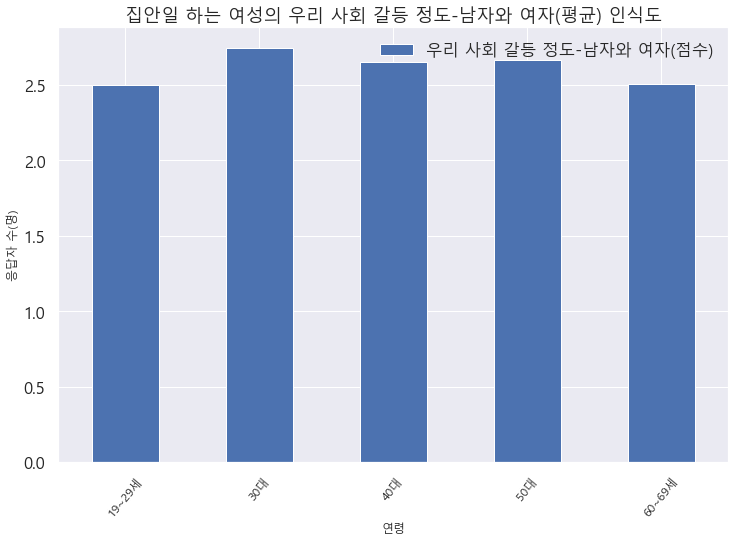

In [596]:
plot = temp_chores[['연령', '우리 사회 갈등 정도-남자와 여자(점수)']].groupby(['연령']).mean().plot.bar(figsize = (12, 8))
plot.tick_params(
    axis = 'x',
    labelrotation = 50,
    labelsize = 'large'
)
plot.set_title('집안일 하는 여성의 우리 사회 갈등 정도-남자와 여자(평균) 인식도')
plot.set_ylabel('응답자 수(명)', fontsize = 'large')
plot.set_xlabel('연령', fontsize = 'large')
plot.legend(loc = 'best')
plot.get_figure().savefig('../../../대학원/3. 20년 3학기/2. 노동시장과빅데이터분석/3. 기말과제/1. 그림/집안일여성_남녀갈등평균.png', dpi = 150)
plt.show()

- 생각외로 19~29세에서 남녀갈등이 심각하다고 생각하는 사람이 적음. 물론 표본이 적어서 단정지을 순 없는 부분임.
- 남녀갈등이 문제라고 응답한 평균 점수대가 높은 순대로 나열하면 30대> 50대 > 40대> 60~69세 > 19~29세

In [598]:
## 집안일 하는 여성의 전체 평균
temp_chores['우리 사회 갈등 정도-남자와 여자(점수)'].mean()

2.634646962233169